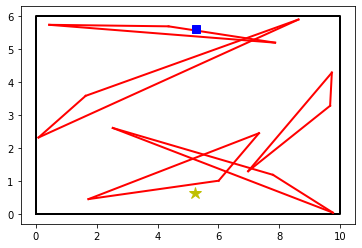

In [1]:
import numpy as np
import pylab as pl
import sys
import random
import math
sys.path.append('osr_examples/scripts/')
import environment_2d
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

# Exercise 1: Solving a 2D motion planning problem by PRM

## I am not using OOP to minimize the time and space complexity needed

In [2]:
#Variables Initialization
x_min = 0
x_max = 10
y_min = 0
y_max = 6
tresh = 3         #CHANGEABLE, radius treshold of nearest neighbours
n_vert = 600        #CHANGEABLE, number of nodes
num_steps = 300         #CHANGEABLE, number of iterations during line check
vert = []
vert_f = [(x_start,y_start),(x_goal, y_goal)]
vert_o = []
edges = []
edgesdist =[]
path = [0]
paths = []

In [3]:
#Vertex Randomization
for i in range(n_vert):
    vert.append((round(random.uniform(x_min,x_max),2), round(random.uniform(y_min,y_max),2)))

In [4]:
#Checking if vertex/node is within an obstacle
for i in range(n_vert):
    if env.check_collision(vert[i][0],vert[i][1]) == False:
        vert_f.append((vert[i][0], vert[i][1]))
    else:
        vert_o.append((vert[i][0], vert[i][1]))

In [5]:
num_free = len(vert_f)

In [6]:
#Line Intersection Check
for i in range(num_free): #Time taking too long? Decrease the n_vert AND/OR num_steps
    for j in range(i+1, num_free):
        x_dist = vert_f[i][0] - vert_f[j][0]
        y_dist = vert_f[i][1] - vert_f[j][1]
        euclid = (math.sqrt(math.pow((x_dist), 2) + math.pow((y_dist), 2)))
        if euclid <= tresh:
            check = True
            y = vert_f[j][1]
            x = vert_f[j][0]
            x_stepsize = x_dist/num_steps
            y_stepsize = y_dist/num_steps
            for z in range(num_steps):
                x += x_stepsize
                y += y_stepsize
                if env.check_collision(x,y) == True:
                    check = False
            if check == True:
                edges.append((i, j))
                edgesdist.append(euclid)

In [7]:
copyedges = edges.copy()

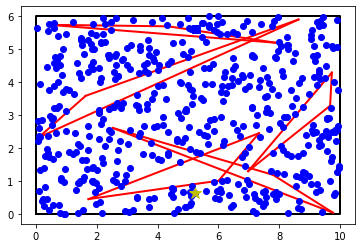

In [8]:
#Plotting the vertex that are not within the obstacle
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
for i in range(len(vert_f)):
    pl.plot(vert_f[i][0],vert_f[i][1], 'bo')
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)


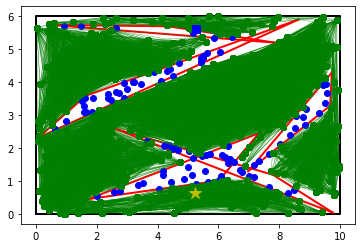

In [9]:
#Plotting the edges that don't intersect the obstacle
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(edges)):
    dot1 = edges[i][0]
    dot2 = edges[i][1]
    pl.plot([vert_f[dot1][0],vert_f[dot2][0]], [vert_f[dot1][1],vert_f[dot2][1]], 'go-', linewidth=0.3)
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)


In [10]:
next_edge = 0
next_edges = []
next_edges_dist = []
visited = []

In [11]:
#Shortest Pathfinding
temp = next_edge
while temp < len(edges):
    if edges[temp] == None:
        break
    elif edges[temp][0] == 0:
        next_edges.append(edges.pop(temp))
        next_edges_dist.append(edgesdist.pop(temp))
        edges.append(None)
    else: 
        temp += 1
        continue

In [12]:
while next_edge != 1:
    todel = []
    cost = 0
    for var in next_edges:
        if var[0] in path and var[1] in path:
            todel.append(next_edges.index(var)-cost)
            cost +=1
    for var in todel:
        next_edges.pop(var)
        next_edges_dist.pop(var)
    mindex = next_edges_dist.index(min(next_edges_dist))
    for i in next_edges[mindex]:
        if i in path:
            prev_path = i
        elif i not in path:
            next_edge = i
            path.append(i)
    paths.append((prev_path, next_edge))
    next_edges.pop(mindex)
    added_dist = next_edges_dist.pop(mindex)
    temp = 0
    while temp < len(edges):
        if edges[temp] == None:
            break
        elif edges[temp][0] == next_edge:
            next_edges.append(edges.pop(temp))
            next_edges_dist.append(edgesdist.pop(temp)+added_dist)
            edges.append(None)
        elif edges[temp][1] == next_edge:
            next_edges.append(edges.pop(temp))
            next_edges_dist.append(edgesdist.pop(temp)+added_dist)
            edges.append(None)
        else: 
            temp += 1
            continue


In [13]:
shortest=[1]
target = 1
for i in range(len(paths)-1, -1, -1):
    if paths[i][1]== target:
        target = paths[i][0]
        shortest.append(target)

<Figure size 432x288 with 0 Axes>

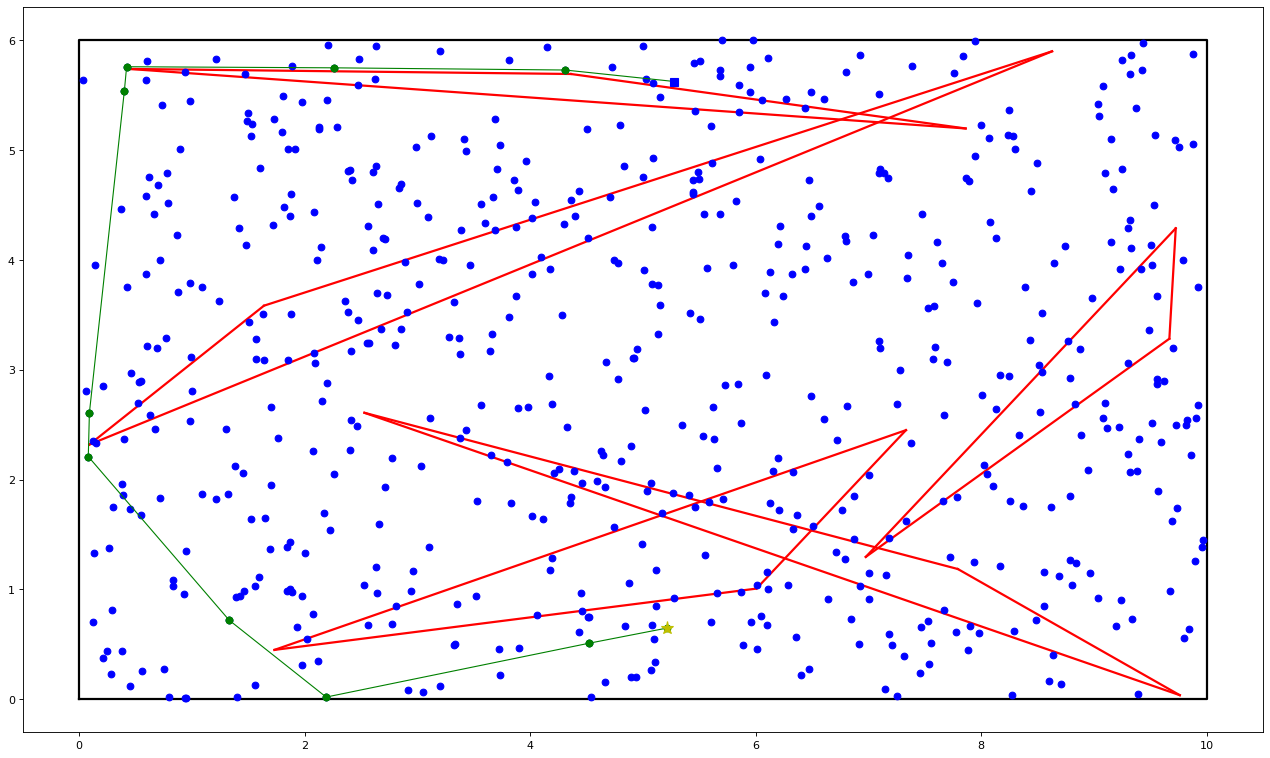

In [14]:
#Shortest Path Plotting
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest)-1):
    dot1 = shortest[i]
    dot2 = shortest[i+1]
    pl.plot([vert_f[dot1][0],vert_f[dot2][0]], [vert_f[dot1][1],vert_f[dot2][1]], 'go-', linewidth=1)
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

### Troubleshooting:
#### Increase n_vert OR tresh if solution not found
#### Increase num_steps if line intersects obstacle OR decrease the tresh


# Exercise 2 : Post-processing a 2D path

In [15]:
shortest.reverse()

In [16]:
num_steps = 2000
shortest_path=[]
for i in shortest:
    shortest_path.append((vert_f[i][0], vert_f[i][1]))

In [17]:
ran = 0
tempcoor = []
for i in range(0, len(shortest_path)):
    if (i+1) < len(shortest_path):
        x= shortest_path[i][0]
        y= shortest_path[i][1]
        ran = random.random()
        x_dist = shortest_path[i][0] - shortest_path[i+1][0]
        y_dist = shortest_path[i][1] - shortest_path[i+1][1]
        x -= ran*x_dist
        y -= ran*y_dist
        tempcoor.append((x,y))


## Showing random points along each line

<Figure size 432x288 with 0 Axes>

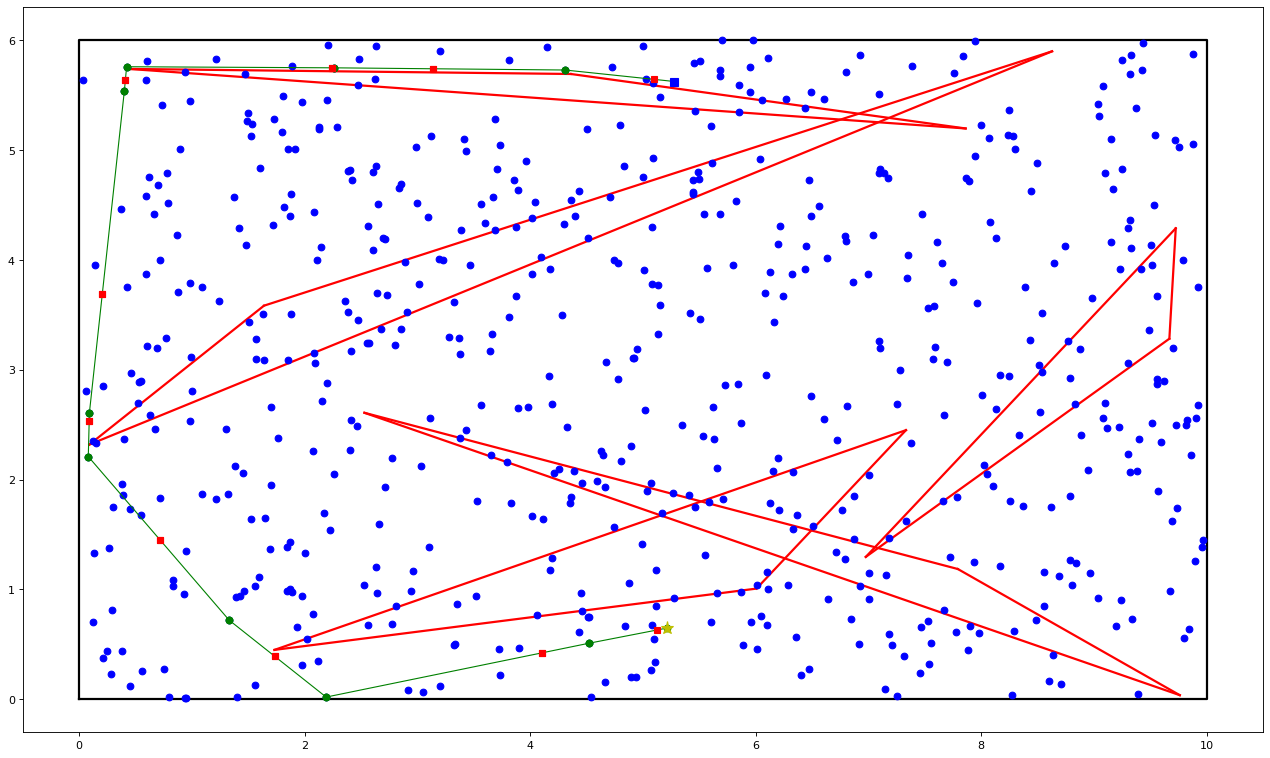

In [18]:
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest_path)-1):
    pl.plot([shortest_path[i][0],shortest_path[i+1][0]],[shortest_path[i][1],shortest_path[i+1][1]], 'go-', linewidth=1)
for i in range(len(tempcoor)-1):
    pl.plot([tempcoor[i][0], tempcoor[i+1][0]],[tempcoor[i][1], tempcoor[i+1][1]], 'rs')
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

In [19]:
cost=1
for i in range(0,len(tempcoor)-1,2):
    check = True
    x_dist = tempcoor[i][0] - tempcoor[i+1][0]
    y_dist = tempcoor[i][1] - tempcoor[i+1][1]
    x_stepsize = x_dist/num_steps
    y_stepsize = y_dist/num_steps
    x=tempcoor[i][0]
    y=tempcoor[i][1]
    for z in range(num_steps):
        x -= x_stepsize
        y -= y_stepsize
        if env.check_collision(x,y) == True:
            check = False
            break
    if check == True:
        shortest_path.insert(i+cost,(tempcoor[i][0],tempcoor[i][1]))
        cost+=1
        shortest_path.pop(i+cost)
        shortest_path.insert(i+cost,(tempcoor[i+1][0],tempcoor[i+1][1]))

## Showing the path shortcutting

<Figure size 432x288 with 0 Axes>

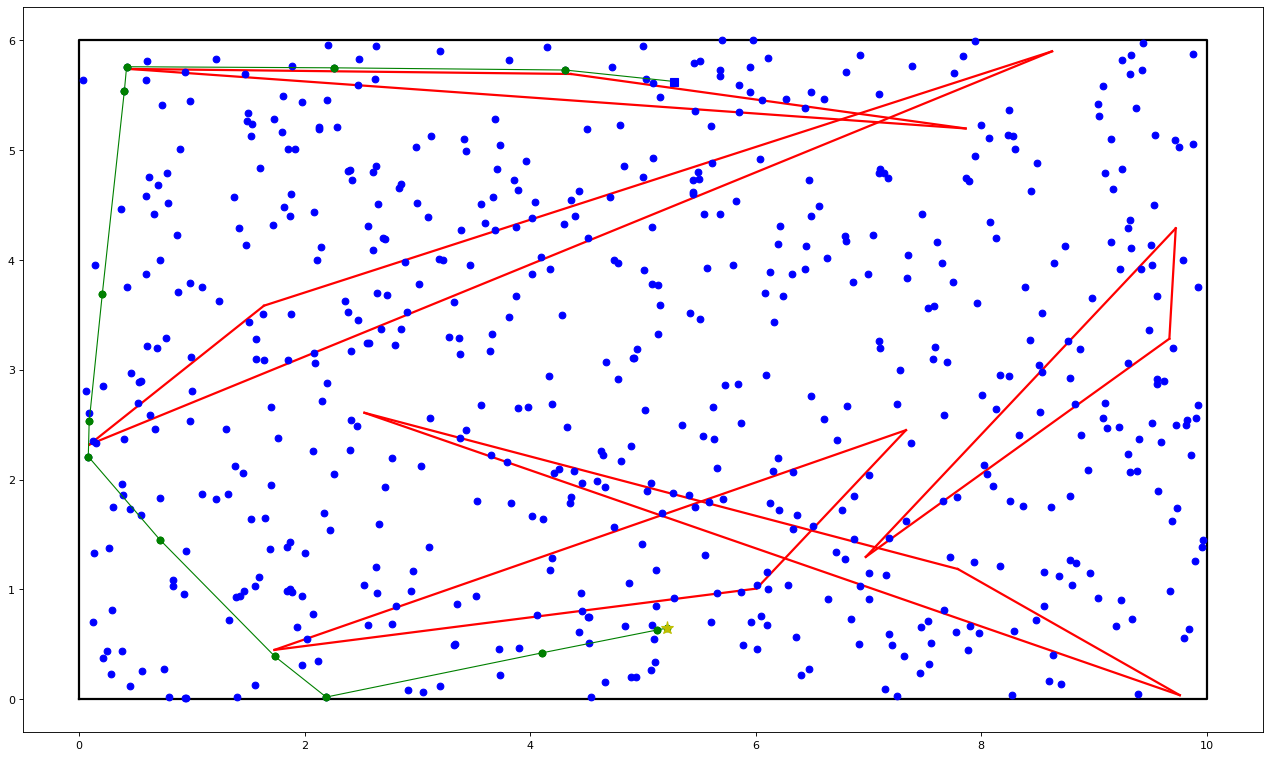

In [20]:
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest_path)-1):
    pl.plot([shortest_path[i][0],shortest_path[i+1][0]],[shortest_path[i][1],shortest_path[i+1][1]], 'go-', linewidth=1)

q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

# Path Shortcutting

In [21]:
#Each repetition will induce shortcutting of both odd and even vertices
repetition = 4
for i in range(repetition):
    ran = 0
    tempcoor = []
    for i in range(0, len(shortest_path)):
        if (i+1) < len(shortest_path):
            x= shortest_path[i][0]
            y= shortest_path[i][1]
            ran = random.random()
            x_dist = shortest_path[i][0] - shortest_path[i+1][0]
            y_dist = shortest_path[i][1] - shortest_path[i+1][1]
            x -= ran*x_dist
            y -= ran*y_dist
            tempcoor.append((x,y))
    cost=1
    for i in range(0,len(tempcoor)-1,2):
        check = True
        x_dist = tempcoor[i][0] - tempcoor[i+1][0]
        y_dist = tempcoor[i][1] - tempcoor[i+1][1]
        x_stepsize = x_dist/num_steps
        y_stepsize = y_dist/num_steps
        x=tempcoor[i][0]
        y=tempcoor[i][1]
        for z in range(num_steps):
            x -= x_stepsize
            y -= y_stepsize
            if env.check_collision(x,y) == True:
                check = False
                continue
        if check == True:
            shortest_path.insert(i+cost,(tempcoor[i][0],tempcoor[i][1]))
            cost+=1
            shortest_path.pop(i+cost)
            shortest_path.insert(i+cost,(tempcoor[i+1][0],tempcoor[i+1][1]))
    ran = 0
    tempcoor = []
    for i in range(0, len(shortest_path)):
        if (i+1) < len(shortest_path):
            x= shortest_path[i][0]
            y= shortest_path[i][1]
            ran = random.random()
            x_dist = shortest_path[i][0] - shortest_path[i+1][0]
            y_dist = shortest_path[i][1] - shortest_path[i+1][1]
            x -= ran*x_dist
            y -= ran*y_dist
            tempcoor.append((x,y))
    cost=1
    for i in range(1,len(tempcoor)-1,2):
        check = True
        x_dist = tempcoor[i][0] - tempcoor[i+1][0]
        y_dist = tempcoor[i][1] - tempcoor[i+1][1]
        x_stepsize = x_dist/num_steps
        y_stepsize = y_dist/num_steps
        x=tempcoor[i][0]
        y=tempcoor[i][1]
        for z in range(num_steps):
            x -= x_stepsize
            y -= y_stepsize
            if env.check_collision(x,y) == True:
                check = False
                break
        if check == True:
            shortest_path.insert(i+cost,(tempcoor[i][0],tempcoor[i][1]))
            cost+=1
            shortest_path.pop(i+cost)
            shortest_path.insert(i+cost,(tempcoor[i+1][0],tempcoor[i+1][1]))


<Figure size 432x288 with 0 Axes>

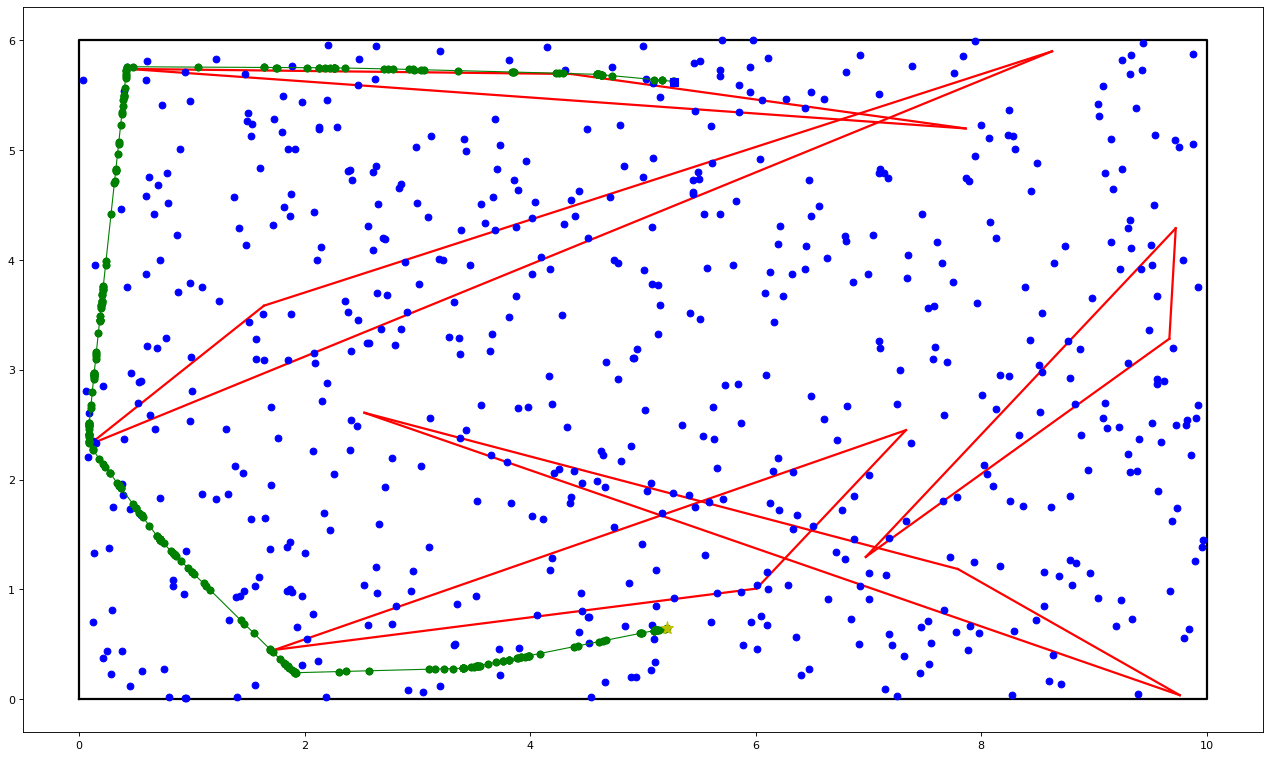

In [22]:
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest_path)-1):
    pl.plot([shortest_path[i][0],shortest_path[i+1][0]],[shortest_path[i][1],shortest_path[i+1][1]], 'go-', linewidth=1)

q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

# Troubleshooting: increase num_steps if there is a collision